## Combination Pulse testing

This notebook is used for testing the CombinationPulse

In [1]:
# Initialize packages
import numpy as np
from matplotlib import pyplot as plt

import qcodes as qc
import silq
from silq.instrument_interfaces import Channel
from silq.pulses import SinePulse, TriggerPulse, PulseImplementation, PulseSequence, CombinationPulse, DCPulse

%matplotlib notebook

pyqtgraph plotting not supported, try "from qcodes.plots.pyqtgraph import QtPlot" to see the full error


In [2]:
# create a SinePulse and a DCPulse that overlap, so we can add them into a combinationpulse
sine_pulse = SinePulse(name='sine', t_start=0, duration=10, 
                       frequency=250, power=1.5, phase=0, acquire=True)
dc_pulse = DCPulse(name='DC', t_start=3, t_stop=13, amplitude=1.0, acquire=True)

In [3]:
# make a combination of the two pulses
combination_pulse = sine_pulse * (dc_pulse + dc_pulse)

In [4]:
combination_pulse

CombinationPulse of: (sine * (DC + DC)) with
	 sine : SinePulse(sine, f=0.00 MHz, power=1.5, t_start=0, t_stop=10)
	 DC : DCPulse(DC, A=1.0, t_start=3, t_stop=13)
	 DC : DCPulse(DC, A=1.0, t_start=3, t_stop=13)

<IPython.core.display.Javascript object>


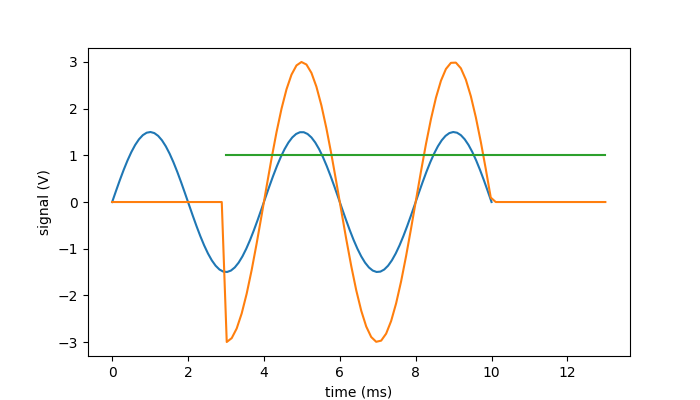

In [5]:
# add all three pulses to a pulse sequence
pulse_sequence = PulseSequence(pulses=[sine_pulse, dc_pulse, combination_pulse])

# Plot pulses
plt.figure(figsize=(7,4))
plt.xlabel('time (ms)')
plt.ylabel('signal (V)')
for pulse in pulse_sequence:
    t_list = np.linspace(pulse.t_start, pulse.t_stop, 100) # ms
    voltages = pulse.get_voltage(t_list)
    plt.plot(t_list, voltages)